In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [144]:
accre_data = pd.read_csv('~/nss_data_science/DataQuestion2/data-question-2-dream-crushers/data/july2017-june2018.txt', delimiter='|')
accre_data.head()

C:\Users\unews\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


In [145]:
# Start and end times were analyzed and converted to datetime64 format 
# in order to eventually determine and compare "elapsed time".  I chose to use this format instead of "elapsed"
# due to errors in str formats (i.e.- ('Unknown string format:', '1-01:05:21'))
accre_data.Start = pd.to_datetime(accre_data.Start)
accre_data.End = pd.to_datetime(accre_data.End)

In [146]:
accre_data['RunCalc'] = accre_data.End - accre_data.Start

In [147]:
# Evaluated syntax and observed the need to filter for jobs less than 5 min.  
# When converting to time to seconds to filter for jobs that took 5 mins or less, it was unclear if the .seconds()
# function could adequately filter for more than 24 hours.
accre_data.RunCalc.head()

0   1 days 01:05:21
1   0 days 23:51:47
2   1 days 01:59:51
3   1 days 08:02:20
4   0 days 00:00:10
Name: RunCalc, dtype: timedelta64[ns]

In [148]:
# Run Calc is converted to number of days in order to filter out all 
# elapsed times greater than 24 hours.
days=accre_data.RunCalc.dt.days
days.head()

0    1
1    0
2    1
3    1
4    0
Name: RunCalc, dtype: int64

In [194]:
# Filtered all cases that have not completed and cases that took more 
# than 24 hrs.
completed=accre_data[accre_data.State == 'COMPLETED']
completed['days']=days
less24hrs = completed[completed.days< 1]

C:\Users\unews\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [150]:
# Confirmed that new dataframe included jobs less than 24 hours.
less24hrs.days.head()

1    0
4    0
5    0
6    0
7    0
Name: days, dtype: int64

In [195]:
# Converted times to secs in order to filter out "RunCalc" or "Elapsed" times that took more 
# than 5 min.
secs_RunCalc=less24hrs.RunCalc.dt.seconds
less24hrs['secs_RunCalc'] = secs_RunCalc
#According to Pandas documentation, number of seconds function only works for
# (>= 0 and less than 1 day) for each element.

C:\Users\unews\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [196]:
prob_jobs = less24hrs[less24hrs.secs_RunCalc<=300] 

In [197]:
# Reduced dataframes to necessary columns
prob_jobs2=prob_jobs[['JobIDRaw', 'User', 'Submit','RunCalc', 'secs_RunCalc']]
prob_jobs2.head()

,JobIDRaw,User,Submit,RunCalc,secs_RunCalc
4,15811617,uscms010,2017-07-01T05:00:00,00:00:10,10
5,15811618,autocms,2017-07-01T05:00:01,00:03:18,198
6,15811619,tuos,2017-07-01T05:00:02,00:02:03,123
7,15811621,uscms010,2017-07-01T05:00:22,00:00:10,10
8,15811624,autocms,2017-07-01T05:01:01,00:04:47,287


In [198]:
prob_users=prob_jobs2.User.value_counts()#returns a series with indices of users.  the list/series has just values... t
# the users are just labels for the rows

In [199]:
# Found users with more than 500 jobs
pu1=prob_users>500

In [200]:
#changes series to dictionary where each user is associated with a boolean factor
pu2=pu1.to_dict()

In [211]:
###Selected users (keys) in dictionary based on "True" (values) condition in dictionary 
#dict has k, v
#pu2 has user as key and whether or not they had 500+ jobs as value (boolean)
badusers=[k for k,v in pu2.items() if v == True] #for k v and pu2 is the iteration... iterate through dictionary and grab keys and values
# the condition we care about is when the value is True
# Creates list of Users

In [212]:
# Compared new list to exisiting dataframe and selected appropiate users
# that have more than 500 jobs under 5 min.
prob_user_jobs=prob_jobs2.loc[prob_jobs2.User.isin(badusers)]# finds rows in dataframe based on new list of badusers

In [213]:
# convert submit time to datetime64 format
prob_user_jobs.loc[:,'Submit'] = pd.to_datetime(prob_user_jobs.Submit)

C:\Users\unews\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [214]:
# sorted times in order of submission
pu3=prob_user_jobs.sort_values(['Submit'])

In [218]:
# Created syntax to order/group jobs by users and the jobs they produced every 4 hours
rollingjobs=pu3.groupby('User').rolling('14400s', on='Submit').JobIDRaw.count()#Why does it change the JobIDRaw

In [220]:
# converted datastructure to dataframe
rolling_df=pd.DataFrame(rollingjobs).reset_index()
rolling_df.head()#shows that JobIDRaw now turns in to number of job within 4 hour period and counts jobs by user 
# within 4 hours

,User,Submit,JobIDRaw
0,abraha1,2017-10-07 19:12:39,1.0
1,abraha1,2017-10-07 19:21:18,2.0
2,abraha1,2017-10-07 19:29:20,3.0
3,abraha1,2017-10-07 19:32:12,4.0
4,abraha1,2017-10-07 21:28:42,5.0


In [166]:
#Evaluated max count per user.  JobIDRaw column now represents the max count for jobs that occur 
# within a 4 hour period and the users that ran them
rolling_df_max=rolling_df.groupby('User').max().reset_index()
rolling_df_max.head()

,User,Submit,JobIDRaw
0,abraha1,2018-06-28 20:17:04,6234.0
1,autocms,2018-06-30 23:55:01,299.0
2,badamifs,2017-08-14 13:50:52,1576.0
3,baoj,2018-01-18 01:05:07,127.0
4,boydb1,2018-06-30 10:46:17,97.0


In [167]:
# Found the users that ran more than 500 jobs within a 4hour window
rolling_user_max=rolling_df_max.loc[rolling_df_max['JobIDRaw']>=500]
rolling_user_max

,User,Submit,JobIDRaw
0,abraha1,2018-06-28 20:17:04,6234.0
2,badamifs,2017-08-14 13:50:52,1576.0
5,brancha1,2018-01-12 02:20:35,1192.0
7,brockc,2018-03-01 00:29:05,8206.0
8,brownbp1,2018-06-26 20:23:07,6833.0
9,cakira,2018-06-25 20:16:52,6388.0
15,chenr6,2018-06-27 22:00:48,1932.0
16,chipmajj,2018-05-07 15:15:23,10596.0
17,cmsglidein,2018-05-23 08:01:27,1390.0
18,dagostle,2017-11-15 17:41:01,1130.0


In [168]:
rolling_df_max.shape

(89, 3)

In [ ]:
rolling_user_max.shape # Out of 89 users that fit previous conditions (i.e. users with more than 500 jobs in total 
# data set that were less than 5 min), 61 users have produced more than 500 jobs within 4 hours


In [170]:
# counts the users that reach 500 during a 4hr. time frame.  Note repeat offenders and index value to observe 
# different job
users500up=rolling_df.loc[rolling_df['JobIDRaw']==500]
print(users500up)

             User              Submit  JobIDRaw
969       abraha1 2018-01-27 23:34:02     500.0
3122      abraha1 2018-03-25 15:15:21     500.0
4573      abraha1 2018-06-22 06:05:40     500.0
5649      abraha1 2018-06-22 20:20:02     500.0
6458      abraha1 2018-06-24 00:07:11     500.0
9158      abraha1 2018-06-27 17:51:37     500.0
432305   badamifs 2017-08-09 22:40:21     500.0
432894   badamifs 2017-08-11 15:07:06     500.0
434577   badamifs 2017-08-14 13:45:07     500.0
439283   brancha1 2017-10-18 03:23:27     500.0
441302   brancha1 2017-12-19 20:13:55     500.0
442489   brancha1 2017-12-20 18:40:48     500.0
443126   brancha1 2017-12-24 11:20:21     500.0
443922   brancha1 2017-12-27 23:05:00     500.0
445114   brancha1 2017-12-28 16:47:53     500.0
446898   brancha1 2018-01-11 22:11:10     500.0
448391     brockc 2017-07-20 01:46:34     500.0
449132     brockc 2017-07-20 08:10:27     500.0
449957     brockc 2017-07-20 13:50:34     500.0
451041     brockc 2017-07-21 04:52:20   

In [171]:
# determine the users with number of repeat offenses
r_o = users500up.User.value_counts()

In [172]:
repeated_offender = pd.DataFrame(r_o).reset_index()
repeated_offender.head()

,index,User
0,brockc,115
1,msrc,82
2,moonj,50
3,ozgunka,47
4,jiany17,21


In [173]:
repeated_offender1=repeated_offender.rename(index=str,columns={'User':'Offense_Count', 'index':'User'})
repeated_offender1.head()

,User,Offense_Count
0,brockc,115
1,msrc,82
2,moonj,50
3,ozgunka,47
4,jiany17,21


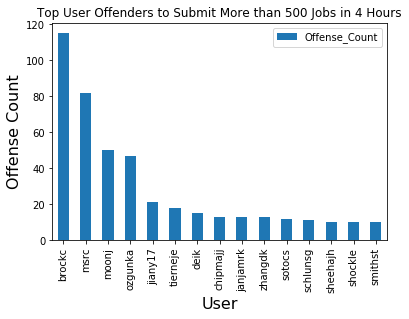

In [233]:
repeated_offender2=repeated_offender1.loc[repeated_offender1['Offense_Count']>=10] #looked at users with more than
# 10 repeatable offenses 

repeated_offender2.plot(kind='bar',x='User',title='Top User Offenders to Submit More than 500 Jobs in 4 Hours')
plt.xlabel('User', fontsize=16)
plt.ylabel('Offense Count', fontsize=16)
plt.show()

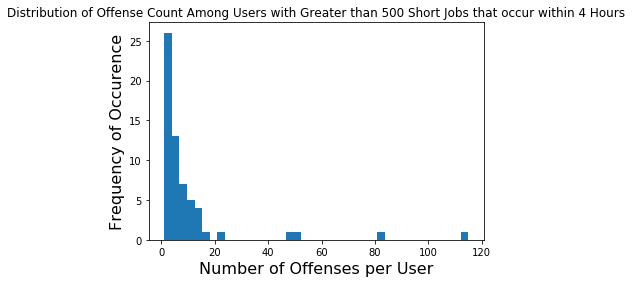

In [241]:
# Evaluates averaage and standard deviation of repeatable offenses


repeated_offender1['Offense_Count'].plot.hist(bins=40,title='Distribution of Offense Count Among Users with Greater than 500 Short Jobs that occur within 4 Hours')
plt.xlabel('Number of Offenses per User',fontsize=16)
plt.ylabel('Frequency of Occurence', fontsize=16)
plt.show()